In [ ]:
#https://thecleverprogrammer.com/2021/03/27/tesla-stock-price-prediction-with-machine-learning/

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

data = pd.read_csv("TSLA.txt")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
1,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
3,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
4,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


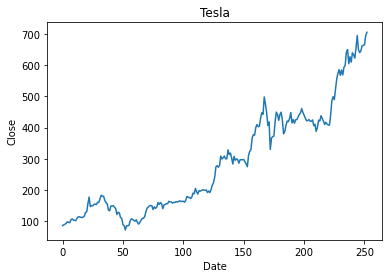

In [4]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [5]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

In [6]:
data = data.rename(columns={"Date" : "ds", "Close" : "y" })

In [7]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
613,2021-12-27,1620.116715,1402.902812,1846.216497
614,2021-12-28,1622.873633,1404.672529,1843.345500
615,2021-12-29,1625.660140,1422.911814,1847.189121
616,2021-12-30,1628.401546,1407.484099,1854.719926
617,2021-12-31,1628.690271,1412.704988,1854.698100


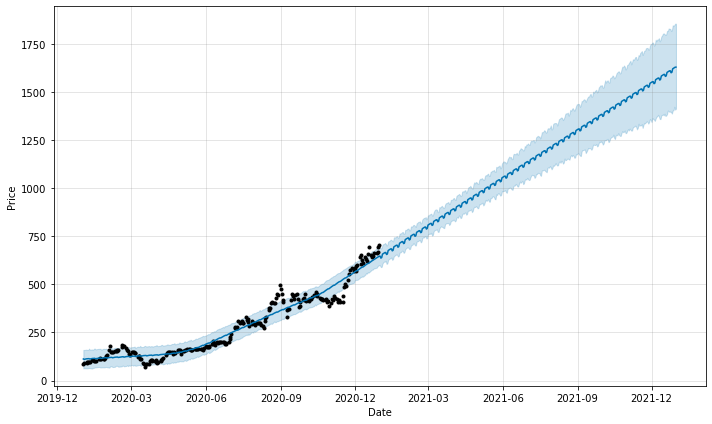

In [8]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")